In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

In [3]:
taxi_January_2023 = pd.read_parquet("data/yellow_tripdata_2023-01.parquet" , engine = "pyarrow")
taxi_January_2023.head(8)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.8,1.00,0.5,10.00,0.0,1.0,27.80,2.5,0.00
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,1,12.1,1.00,0.5,3.42,0.0,1.0,20.52,2.5,0.00
7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,1,45.7,1.00,0.5,10.74,3.0,1.0,64.44,2.5,0.00


In [4]:
taxi_January_2023.shape

(3066766, 19)

In [5]:
taxi_January_2023["passenger_count"].value_counts()

1.0    2261400
2.0     451536
3.0     106353
4.0      53745
0.0      51164
5.0      42681
6.0      28124
8.0         13
7.0          6
9.0          1
Name: passenger_count, dtype: int64

In [6]:
taxi_January_2023 = taxi_January_2023[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [7]:
taxi_January_2023.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,2,14.30
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,1,16.90
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,1,34.90
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,138,7,1,20.85
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,1,19.68


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>],
       [<AxesSubplot:title={'center':'payment_type'}>,
        <AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>]],
      dtype=object)

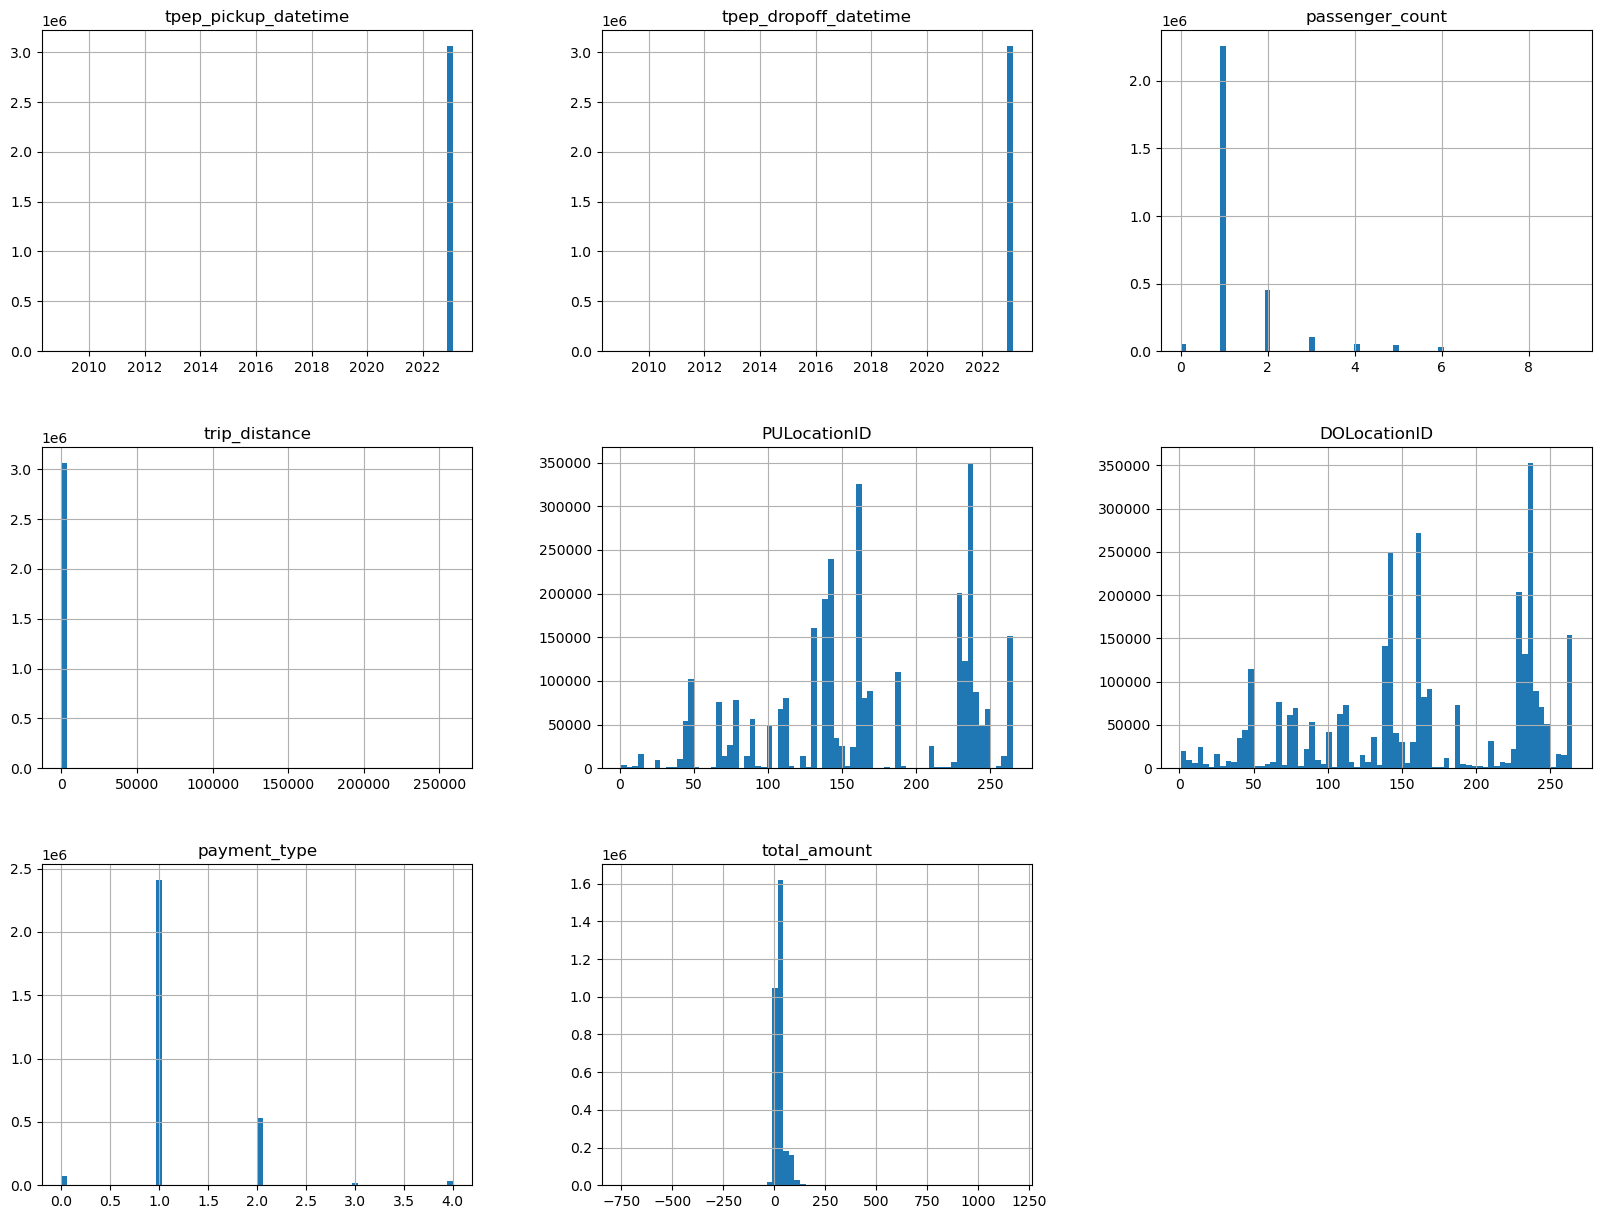

In [8]:
taxi_January_2023.hist(figsize=(20 , 15) , bins=70)

<AxesSubplot:xlabel='index', ylabel='total_amount'>

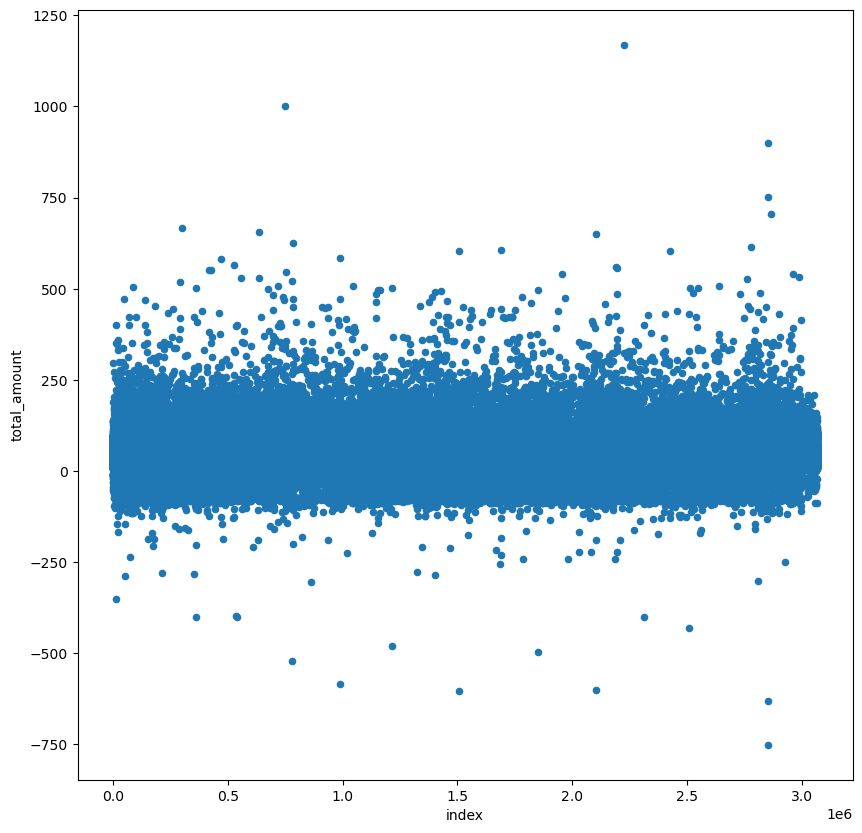

In [10]:
taxi_January_2023.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,10))

In [11]:
taxi_January_2023[taxi_January_2023['total_amount'] < 0].shape
taxi_January_2023[taxi_January_2023['total_amount'] < 0]["trip_distance"].value_counts()

0.00       3060
0.01        546
0.02        368
0.03        271
0.04        198
           ... 
27.12         1
24.99         1
68.16         1
12.97         1
3685.21       1
Name: trip_distance, Length: 1953, dtype: int64

In [12]:
taxi_January_2023[taxi_January_2023['total_amount'] == 0].shape
taxi_January_2023[taxi_January_2023['total_amount'] == 0]["trip_distance"].value_counts()

0.00     450
0.10      21
0.70       8
0.80       7
0.30       7
0.20       5
0.50       5
0.40       4
1.00       4
2.70       4
1.20       4
1.10       4
1.40       3
3.50       2
2.20       2
1.50       2
1.30       2
20.80      2
2.80       2
2.30       2
0.60       2
12.00      2
4.50       1
2.10       1
8.80       1
14.00      1
18.80      1
3.10       1
0.67       1
6.80       1
14.90      1
3.80       1
1.60       1
18.90      1
5.50       1
10.40      1
15.90      1
17.60      1
4.30       1
18.10      1
8.10       1
3.40       1
7.10       1
0.01       1
6.00       1
1.80       1
Name: trip_distance, dtype: int64

In [13]:
taxi_January_2023.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
count,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06
mean,1.362532e+00,3.847342e+00,1.663980e+02,1.643926e+02,1.194483e+00,2.702038e+01
std,8.961200e-01,2.495838e+02,6.424413e+01,6.994368e+01,5.294762e-01,2.216359e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.510000e+02
25%,1.000000e+00,1.060000e+00,1.320000e+02,1.140000e+02,1.000000e+00,1.540000e+01
50%,1.000000e+00,1.800000e+00,1.620000e+02,1.620000e+02,1.000000e+00,2.016000e+01
75%,1.000000e+00,3.330000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.870000e+01
max,9.000000e+00,2.589281e+05,2.650000e+02,2.650000e+02,4.000000e+00,1.169400e+03


In [14]:
taxi_January_2023[taxi_January_2023["total_amount"] > 200].shape

(1736, 8)

In [15]:
taxi_January_2023_filtered = taxi_January_2023[(taxi_January_2023['total_amount']>=0) & (taxi_January_2023['total_amount']<200)]
taxi_January_2023_filtered.shape

(3039817, 8)

In [16]:
taxi_January_2023_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71694
trip_distance                0
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [17]:
print(taxi_January_2023_filtered["passenger_count"].mean())
taxi_January_2023_filtered["passenger_count"].value_counts()

1.3628030239986686


1.0    2240547
2.0     447420
3.0     105320
4.0      53042
0.0      51130
5.0      42567
6.0      28077
8.0         13
7.0          6
9.0          1
Name: passenger_count, dtype: int64

In [18]:
taxi_January_2023_filtered.fillna(1.36 , inplace=True)

C:\Users\Arya.tf\AppData\Local\Temp\ipykernel_21556\2906909669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_January_2023_filtered.fillna(1.36 , inplace=True)


In [19]:
taxi_January_2023_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [72]:
taxi_January_2023_prep = taxi_January_2023_filtered.copy()

In [73]:
taxi_January_2023_prep.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [74]:
taxi_January_2023_prep.loc[: , "PULocationID"] = taxi_January_2023_prep["PULocationID"].astype(str)
taxi_January_2023_prep.loc[: , "DOLocationID"] = taxi_January_2023_prep["DOLocationID"].astype(str)
taxi_January_2023_prep.loc[: , "payment_type"] = taxi_January_2023_prep["payment_type"].astype(str)

In [75]:
taxi_January_2023_prep.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [76]:
taxi_January_2023_prep["transaction_year"] = taxi_January_2023_prep["tpep_pickup_datetime"].dt.year
taxi_January_2023_prep["transaction_month"] = taxi_January_2023_prep["tpep_pickup_datetime"].dt.month
taxi_January_2023_prep["transaction_day"] = taxi_January_2023_prep["tpep_pickup_datetime"].dt.day
taxi_January_2023_prep["transaction_hour"] = taxi_January_2023_prep["tpep_pickup_datetime"].dt.hour
taxi_January_2023_prep["transaction_date"] = taxi_January_2023_prep["tpep_pickup_datetime"].dt.date

In [77]:
taxi_January_2023_prep.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_date
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,2,14.30,2023,1,1,0,2023-01-01
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,1,16.90,2023,1,1,0,2023-01-01
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,1,34.90,2023,1,1,0,2023-01-01
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,138,7,1,20.85,2023,1,1,0,2023-01-01
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,1,19.68,2023,1,1,0,2023-01-01


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>]], dtype=object)

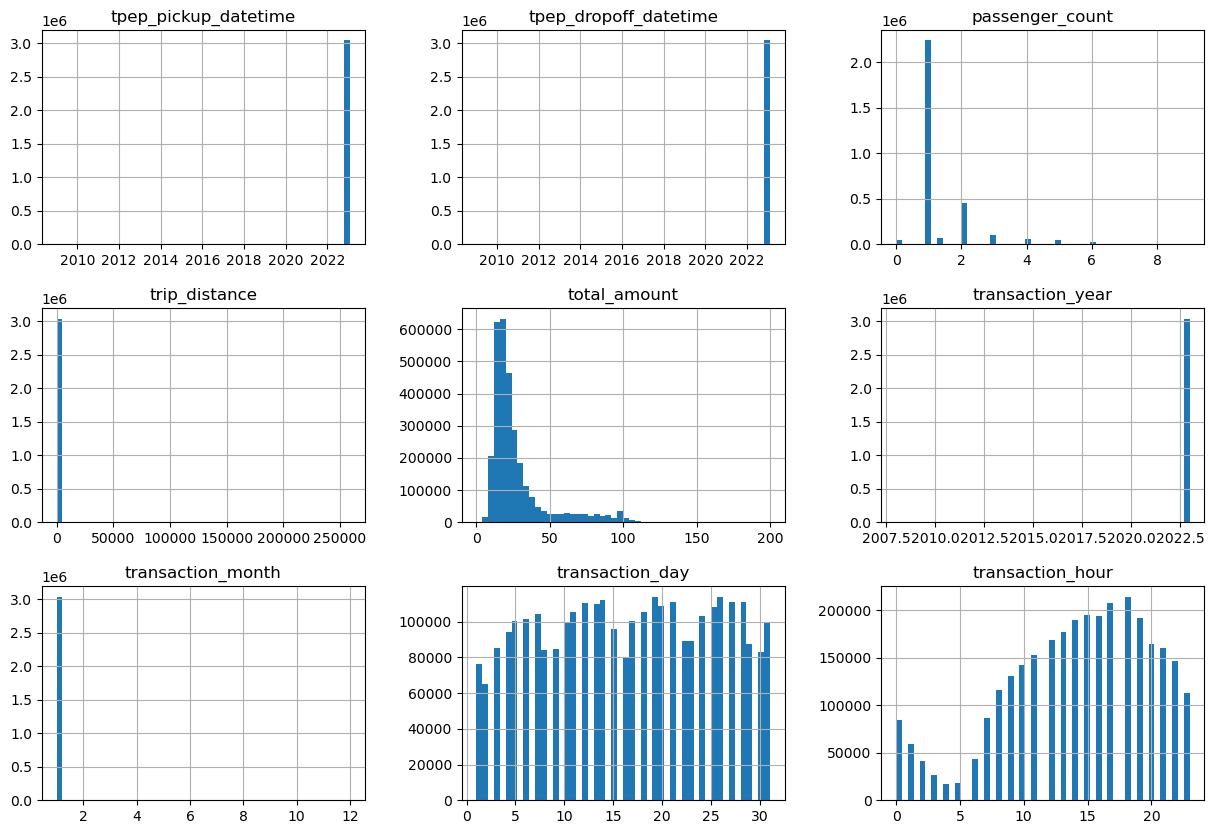

In [78]:
taxi_January_2023_prep.hist(figsize=(15 , 10) , bins=50)

In [79]:
print(taxi_January_2023_prep["transaction_year"].value_counts())
print(taxi_January_2023_prep["transaction_month"].value_counts())

2023    3039779
2022         36
2008          2
Name: transaction_year, dtype: int64
1     3039769
12         27
10         11
2          10
Name: transaction_month, dtype: int64


In [80]:
taxi_January_2023_prep = taxi_January_2023_prep[taxi_January_2023_prep["transaction_year"] == 2023]
taxi_January_2023_prep = taxi_January_2023_prep[taxi_January_2023_prep["transaction_month"] == 1]

In [81]:
print(taxi_January_2023_prep.shape)
taxi_January_2023_prep.head()

(3039769, 13)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_date
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,2,14.30,2023,1,1,0,2023-01-01
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,1,16.90,2023,1,1,0,2023-01-01
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,1,34.90,2023,1,1,0,2023-01-01
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,138,7,1,20.85,2023,1,1,0,2023-01-01
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,1,19.68,2023,1,1,0,2023-01-01


In [82]:
taxi_January_2023_main = taxi_January_2023_prep[["PULocationID" ,'transaction_date','transaction_month','transaction_day','transaction_hour','trip_distance','total_amount']]
taxi_January_2023_main.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,161,2023-01-01,1,1,0,0.97,14.30
1,43,2023-01-01,1,1,0,1.10,16.90
2,48,2023-01-01,1,1,0,2.51,34.90
3,138,2023-01-01,1,1,0,1.90,20.85
4,107,2023-01-01,1,1,0,1.43,19.68


In [83]:
taxi_January_2023_main.dtypes

PULocationID          object
transaction_date      object
transaction_month      int64
transaction_day        int64
transaction_hour       int64
trip_distance        float64
total_amount         float64
dtype: object

In [84]:
taxi_January_2023_main.loc[: , "transaction_month"] = taxi_January_2023_prep["transaction_month"].astype(str)
taxi_January_2023_main.loc[: , "transaction_day"] = taxi_January_2023_prep["transaction_day"].astype(str)
taxi_January_2023_main.loc[: , "transaction_hour"] = taxi_January_2023_prep["transaction_hour"].astype(str)
taxi_January_2023_main.dtypes

C:\Users\Arya.tf\AppData\Local\Temp\ipykernel_21556\368348345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_January_2023_main.loc[: , "transaction_month"] = taxi_January_2023_prep["transaction_month"].astype(str)
C:\Users\Arya.tf\AppData\Local\Temp\ipykernel_21556\368348345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_January_2023_main.loc[: , "transaction_day"] = taxi_January_2023_prep["transaction_day"].astype(str)
C:\Users\Arya.tf\AppData\Local\Temp\ipykernel_21556\368348345.py:3: 

PULocationID          object
transaction_date      object
transaction_month     object
transaction_day       object
transaction_hour      object
trip_distance        float64
total_amount         float64
dtype: object

In [94]:
taxi_grouped_by_region = taxi_January_2023_main.groupby(['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']).mean().reset_index()
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(71409, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2023-01-01,1,1,11,0.00000,115.200000
1,1,2023-01-01,1,1,12,0.00000,148.315000
2,1,2023-01-01,1,1,13,8.00000,146.047500
3,1,2023-01-01,1,1,14,0.20000,121.816667
4,1,2023-01-01,1,1,15,0.03125,67.313750


In [165]:
data_for_modeliing = taxi_grouped_by_region.copy()

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [167]:
X = data_for_modeliing[['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']]
y = data_for_modeliing["total_amount"]

In [168]:
print(X.shape)
y.shape

(71409, 5)


(71409,)

In [169]:
X = pd.get_dummies(X)

In [170]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33)

In [171]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47844, 344)
(23565, 344)
(47844,)
(23565,)


In [176]:
tree = DecisionTreeRegressor(max_depth=10)

In [177]:
tree.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=10)

In [178]:
pred = tree.predict(X_test)

In [180]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('mean_absolute_error: ', mean_absolute_error(y_test, pred))
print('mean_squared_error: ', mean_squared_error(y_test, pred))
print('r2 :', r2_score(y_test,pred))

mean_absolute_error:  11.607247842123888
mean_squared_error:  303.2384990011978
r2 : 0.3005181575197613


<AxesSubplot:xlabel='true', ylabel='pred'>

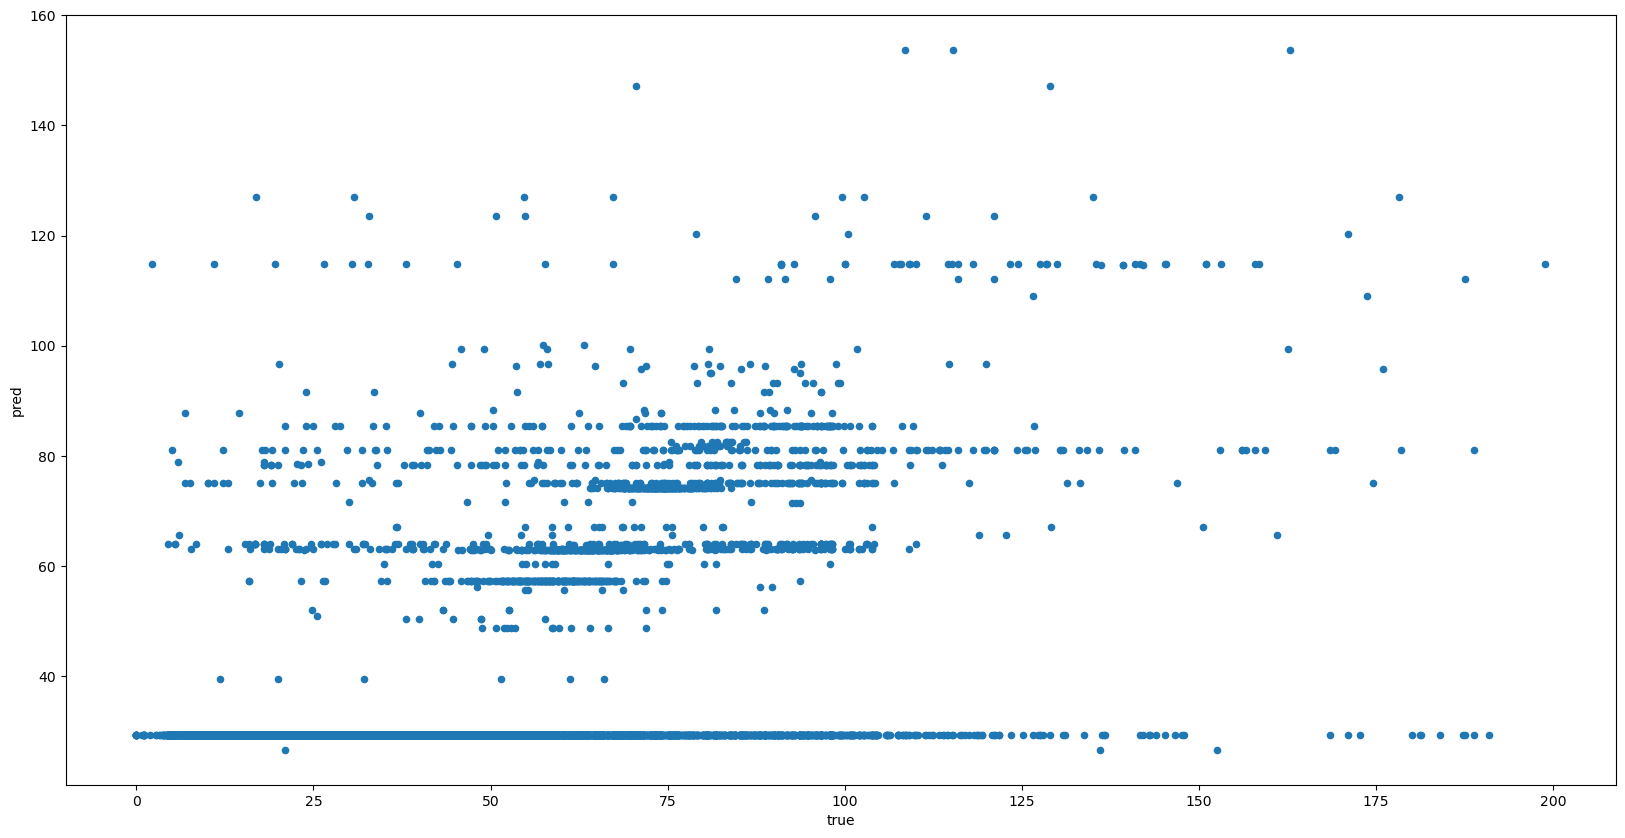

In [181]:
data = {'true': y_test, 'pred': pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')